In [421]:
!pip --quiet install rpy2==3.5.1
# !pip --quiet install scanpy

# Melanoma

In [422]:
import numpy as np
import pandas as pd

In [423]:
df = pd.read_csv('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/Melanoma/PCS/CSV/pcs_from_BayesSpace.csv')
df = df.set_index('Unnamed: 0')
df.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
Unnamed: 0                                                               
7x15       -1.982938  1.451236  7.227435 -2.106858  2.104251  0.354453   
7x16       -1.539104  0.529934 -1.203405 -2.046447  1.884362 -4.024942   
7x17        0.231622  1.058717 -3.356286 -0.538397 -1.522835 -0.635455   
7x18       -4.010939  2.256405 -2.351316  1.263670 -0.592105  0.132502   
8x13        1.166187  0.106367  2.860336 -2.596404  6.187710  1.161294   

                 PC7       PC8       PC9      PC10  ...      PC41      PC42  \
Unnamed: 0                                          ...                       
7x15        1.586469 -0.577720  0.092206 -0.782151  ...  0.723342  2.138887   
7x16        0.411495  0.115264  1.388323  3.219778  ... -0.430543 -4.197575   
7x17        3.050837  2.634737 -0.509782 -0.033459  ...  3.764614 -5.205424   
7x18        2.365455  1.794860  0.478109 -2.340696  ...  0.388967 -1.465521   
8x13        3.346597  1.526561 -1.771259  0.052941  ... -4.728920  0.798667   

                PC43      PC44      PC45      PC46      PC47      PC48  \
Unnamed: 0                                                               
7x15        1.756210 -1.148131 -2.296717 -1.763797  2.793035  0.426257   
7x16       -2.329836 -4.015889  0.390060 -0.746663  4.104490  5.815581   
7x17        0.190858 -1.686006  1.953466 -3.622777  0.918110  1.619203   
7x18        2.409918  2.560179 -0.583893 -1.223070  4.310557 -3.804695   
8x13       -3.961602 -2.676886  0.429984  1.374256  3.431658  6.403056   

                PC49      PC50  
Unnamed: 0                      
7x15       -2.611564  0.784603  
7x16        1.292975 -0.926038  
7x17       -4.480649  4.488098  
7x18        1.561435  0.616317  
8x13       -4.787701 -0.087295  

[5 rows x 50 columns]

In [424]:
def mclust_R(x, n_clusters, model='EEE', random_seed=2020):
    """\
    Clustering using the mclust algorithm.
    The parameters are the same as those in the R package mclust.
    """

    np.random.seed(random_seed)
    import rpy2.robjects as robjects
    # robjects.r('install.packages("mclust")')
    robjects.r.library("mclust")

    import rpy2.robjects.numpy2ri
    rpy2.robjects.numpy2ri.activate()
    r_random_seed = robjects.r['set.seed']
    r_random_seed(random_seed)
    rmclust = robjects.r['Mclust']

    res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(x), n_clusters, model)
    probabilities = res[-3] # probability that spot i is in cluster k
    mclust_res = np.array(res[-2]).astype(int) - 1
    
    return mclust_res, probabilities

In [425]:
n_pcs = 4
n_clusters = 4
model = 'EEE'

In [426]:
out, p = mclust_R(df.values[:, :n_pcs], n_clusters, model=model)

fitting ...
  |======================================================================| 100%


In [427]:
# np.save(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision/Data/others/Melanoma/Mclust_stuffs/probabilites_model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.npy', p)

In [428]:
df_mclust_scribble = pd.DataFrame({'cluster.init':out},index=df.index.values)
df_mclust_probabilities = pd.DataFrame(p, index=df.index.values, columns=list(range(n_clusters)))

In [429]:
df_mclust_probabilities.to_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/Melanoma/Mclust_stuffs/probabilites_model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.csv')

In [430]:
df_mclust_scribble.head()

cluster.init
7x15             0
7x16             0
7x17             1
7x18             2
8x13             0

In [431]:
df_mclust_scribble.to_csv('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/Melanoma/mclust_scribble.csv')

In [432]:
x_pixels = []
y_pixels = []

for spot in df_mclust_scribble.index:
    y_pixels.append(int(spot.split('x')[1]))
    x_pixels.append(int(spot.split('x')[0]))


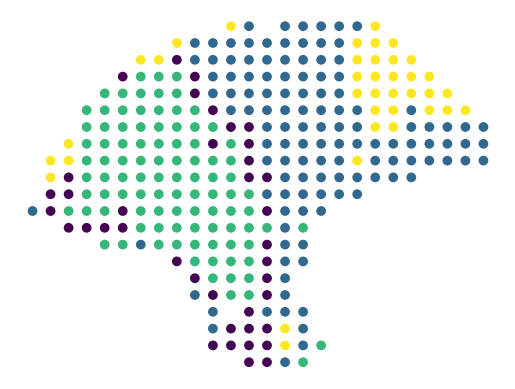

In [433]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.scatter(y_pixels,x_pixels,c=df_mclust_scribble['cluster.init'].values)
plt.savefig(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/Melanoma/Mclust_stuffs/Figures/model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.jpg')

# BCDC

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
df = pd.read_csv('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/Principal_Components/CSV/pcs_from_BayesSpace.csv')
df = df.set_index('Unnamed: 0')
df.head()

PC1       PC2       PC3        PC4       PC5  \
Unnamed: 0                                                               
AAACAAGTATCTCCCA-1 -24.172837 -4.584487 -5.580652  -7.483126 -3.153095   
AAACACCAATAACTGC-1  12.371814 -7.119854  1.111503   6.011971 -1.706524   
AAACAGAGCGACTCCT-1  -3.332869  8.108653 -0.767820   2.651592 -5.220421   
AAACAGCTTTCAGAAG-1  18.560136 -5.305400 -6.492975  -0.508268  8.882438   
AAACAGGGTCTATATT-1  19.731972  4.777125 -3.900597  11.087617 -2.803057   

                         PC6       PC7       PC8       PC9      PC10  ...  \
Unnamed: 0                                                            ...   
AAACAAGTATCTCCCA-1  7.412906  6.177085 -6.280111  0.964592 -0.231141  ...   
AAACACCAATAACTGC-1  0.407444 -3.293848 -3.584912 -4.770865 -0.836646  ...   
AAACAGAGCGACTCCT-1 -3.928020  0.967914  3.524890  2.953696  1.341893  ...   
AAACAGCTTTCAGAAG-1 -4.031581 -0.936315 -5.811802 -4.702970 -1.607525  ...   
AAACAGGGTCTATATT-1 -1.338318  1.830107 -1.782119  0.868354 -1.875265  ...   

                        PC41      PC42      PC43      PC44      PC45  \
Unnamed: 0                                                             
AAACAAGTATCTCCCA-1 -0.797702 -1.279520  0.397960  1.556852  0.405762   
AAACACCAATAACTGC-1 -0.155983  0.095501 -0.253659  3.583630  1.230429   
AAACAGAGCGACTCCT-1 -0.467551 -1.573397  0.409903  0.112414 -0.686113   
AAACAGCTTTCAGAAG-1 -2.723164 -2.660492 -1.209101 -0.153525 -0.067646   
AAACAGGGTCTATATT-1 -1.034070  0.185567 -3.602873 -1.469547 -1.224941   

                        PC46      PC47      PC48      PC49      PC50  
Unnamed: 0                                                            
AAACAAGTATCTCCCA-1  0.752002  0.081068  1.099147 -2.098680  0.406139  
AAACACCAATAACTGC-1 -0.719319 -2.936411 -1.881433  0.106199 -1.916616  
AAACAGAGCGACTCCT-1  0.089220  1.113295 -0.142345 -0.681478 -0.147775  
AAACAGCTTTCAGAAG-1 -1.371546 -3.124887 -1.936471 -3.116308  2.105497  
AAACAGGGTCTATATT-1 -2.363628  3.170860  3.857899  0.732894  0.595375  

[5 rows x 50 columns]

In [436]:
def mclust_R(x, n_clusters, model='EEE', random_seed=2020):
    """\
    Clustering using the mclust algorithm.
    The parameters are the same as those in the R package mclust.
    """

    np.random.seed(random_seed)
    import rpy2.robjects as robjects
    # robjects.r('install.packages("mclust")')
    robjects.r.library("mclust")

    import rpy2.robjects.numpy2ri
    rpy2.robjects.numpy2ri.activate()
    r_random_seed = robjects.r['set.seed']
    r_random_seed(random_seed)
    rmclust = robjects.r['Mclust']

    res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(x), n_clusters, model)
    probabilities = res[-3] # probability that spot i is in cluster k
    mclust_res = np.array(res[-2]).astype(int) - 1
    
    return mclust_res, probabilities

In [4]:
n_pcs = 15
n_clusters = 2
model = 'EEE'

In [14]:
df.iloc[:, :n_pcs].to_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/Principal_Components/CSV/pcs_{n_pcs}_from_bayesSpace_top_2000_HVGs.csv')


In [438]:
out, p = mclust_R(df.values[:, :n_pcs], n_clusters, model=model)

fitting ...
  |======================================================================| 100%


In [439]:
# np.save(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision/Data/others/Melanoma/Mclust_stuffs/probabilites_model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.npy', p)

In [440]:
df_mclust_scribble = pd.DataFrame({'cluster.init':out},index=df.index.values)
df_mclust_probabilities = pd.DataFrame(p, index=df.index.values, columns=list(range(n_clusters)))

In [441]:
df_mclust_probabilities.to_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/Mclust_stuffs/probabilites_model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.csv')

In [442]:
df_mclust_scribble.head()

cluster.init
AAACAAGTATCTCCCA-1             1
AAACACCAATAACTGC-1             0
AAACAGAGCGACTCCT-1             0
AAACAGCTTTCAGAAG-1             0
AAACAGGGTCTATATT-1             0

In [443]:
df_mclust_scribble.to_csv('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/mclust_scribble.csv')

In [444]:
adata = sc.read('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/reading_h5/bcdc_ffpe_filtered_feature_bc_matrix.h5')

In [445]:
df_joined = adata.obs.join(df_mclust_scribble)

In [446]:
df_joined

in_tissue  array_row  array_col     imagecol     imagerow  \
AAACAAGTATCTCCCA-1          1         50        102  1452.280407  1184.977467   
AAACACCAATAACTGC-1          1         59         19   575.040095  1349.701355   
AAACAGAGCGACTCCT-1          1         14         94  1368.352092   522.949170   
AAACAGCTTTCAGAAG-1          1         43          9   469.619720  1055.442272   
AAACAGGGTCTATATT-1          1         47         13   511.802441  1129.025257   
...                       ...        ...        ...          ...          ...   
TTGTTCAGTGTGCTAC-1          1         24         64  1051.143860   706.542359   
TTGTTGTGTGTCAAGA-1          1         31         77  1188.401625   835.421863   
TTGTTTCACATCCAGG-1          1         58         42   818.082507  1331.560600   
TTGTTTCATTAGTCTA-1          1         60         30   691.242927  1368.206383   
TTGTTTCCATACAACT-1          1         45         27   659.769809  1092.379473   

                    cluster.init  
AAACAAGTATCTCCCA-1             1  
AAACACCAATAACTGC-1             0  
AAACAGAGCGACTCCT-1             0  
AAACAGCTTTCAGAAG-1             0  
AAACAGGGTCTATATT-1             0  
...                          ...  
TTGTTCAGTGTGCTAC-1             0  
TTGTTGTGTGTCAAGA-1             0  
TTGTTTCACATCCAGG-1             0  
TTGTTTCATTAGTCTA-1             0  
TTGTTTCCATACAACT-1             0  

[2518 rows x 6 columns]

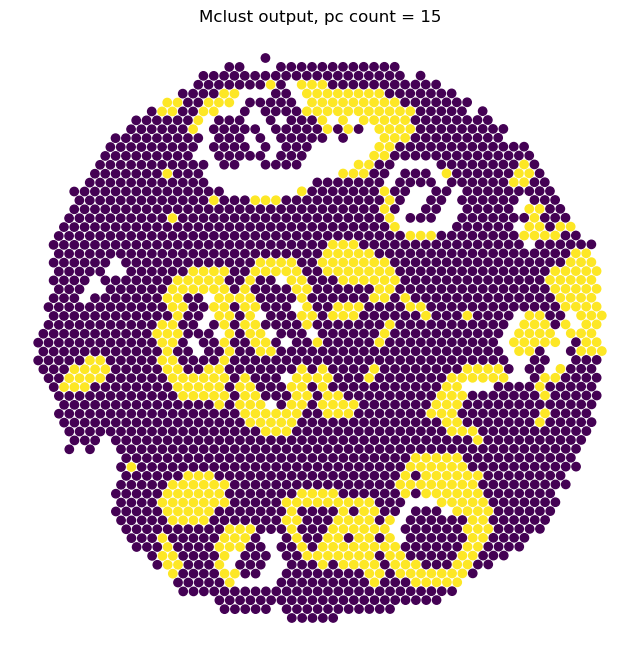

In [447]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title(f'Mclust output, pc count = {n_pcs}')
plt.scatter(df_joined['imagecol'],df_joined['imagerow'],c=df_joined['cluster.init'].values)
plt.savefig(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/Mclust_stuffs/Figures/model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.jpg')

In [448]:
df_man = pd.read_csv('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/manual_annotations.csv', index_col=0)

In [449]:
df_joined_with_man = df_joined.join(df_man)

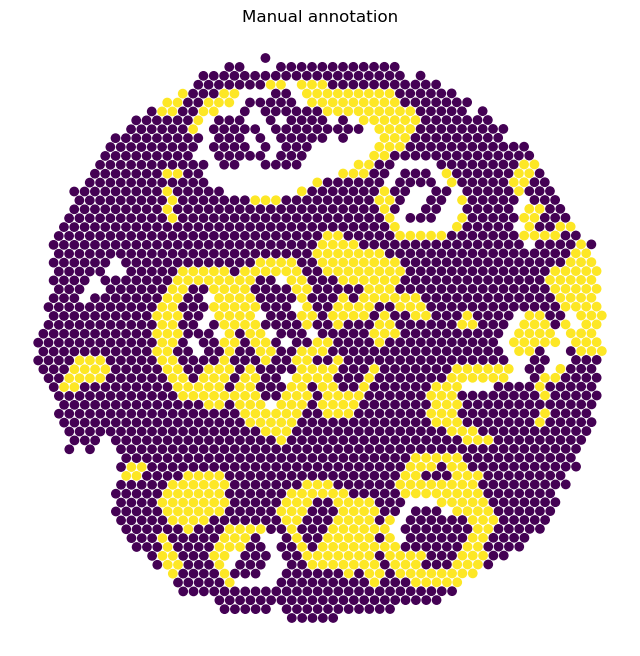

In [450]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Manual annotation')
plt.scatter(df_joined_with_man['imagecol'],df_joined_with_man['imagerow'],c=df_joined_with_man['label'].values)
plt.savefig('/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/manual_annotation.jpg')

# DLPFC

In [26]:
import numpy as np
import pandas as pd
import scanpy as sc
import math
import os

In [27]:
samples = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']

fitting ...
  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%
fitting ...
  |                                                                      |   0%

/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  |======================================================================| 100%


/home/nuwaisir/miniconda3/envs/scribble_seg/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


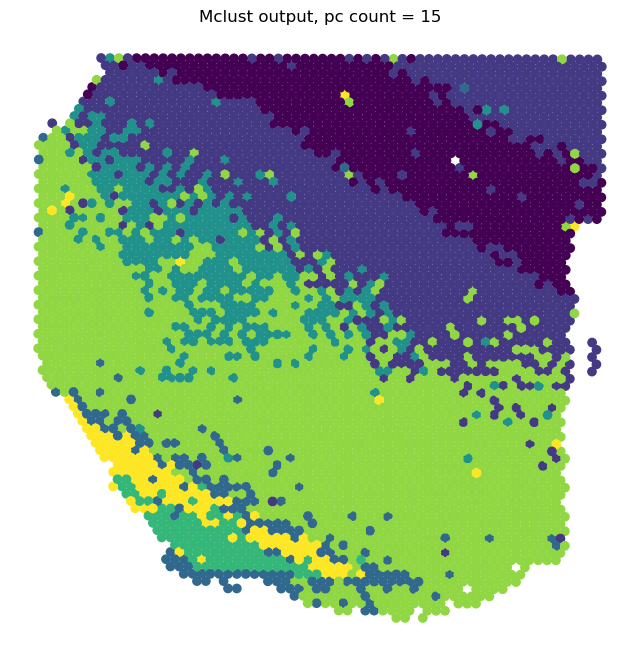

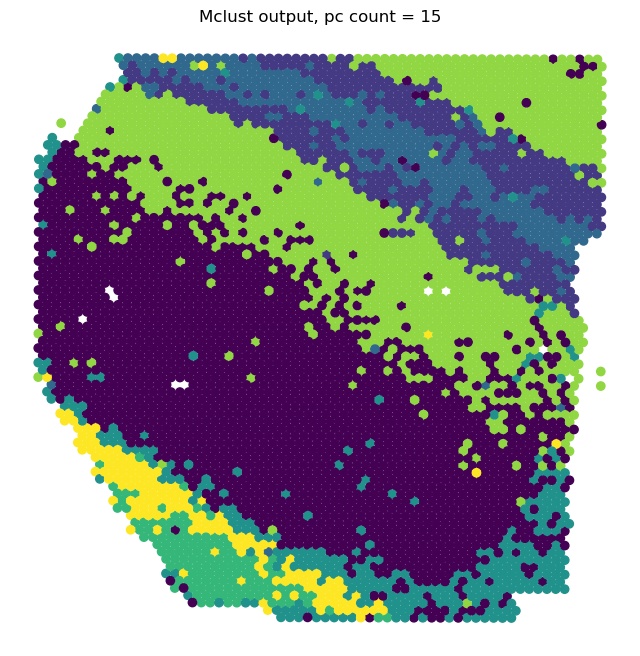

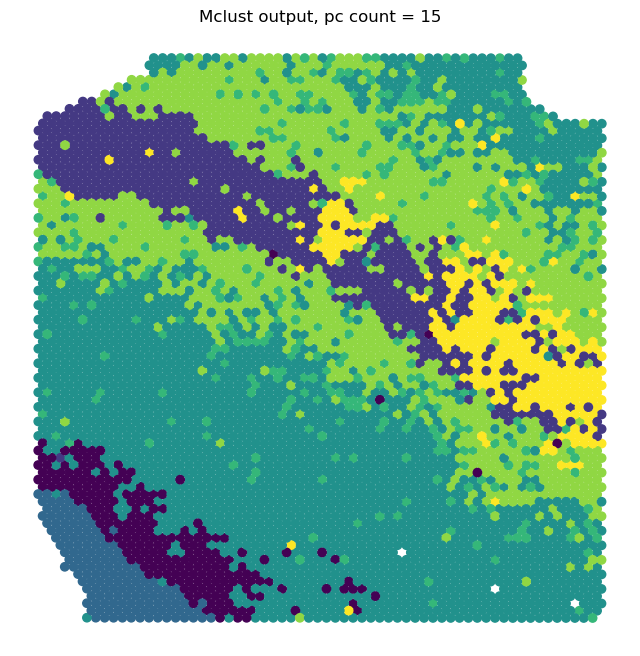

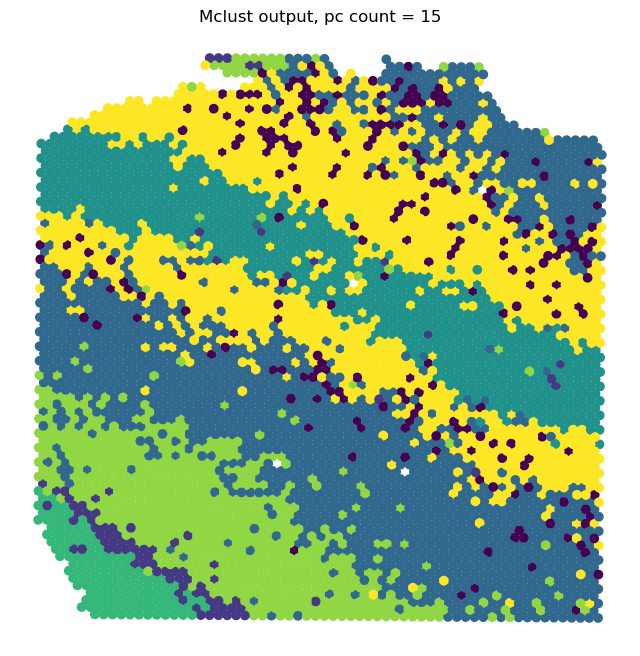

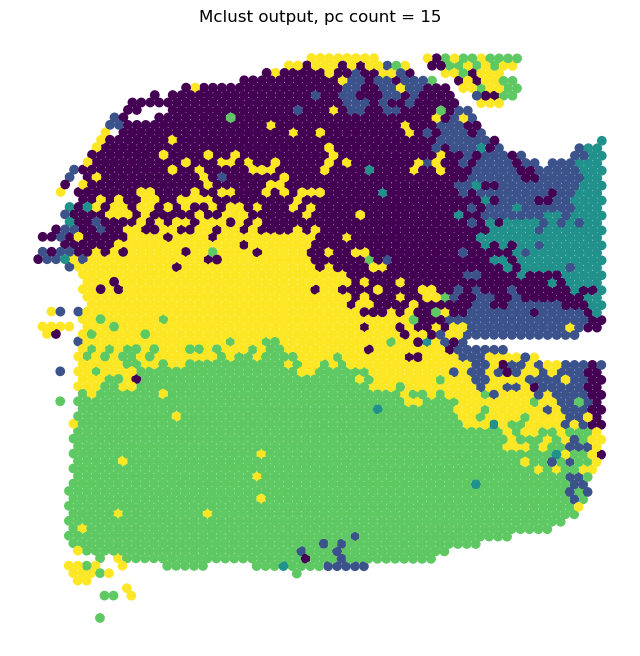

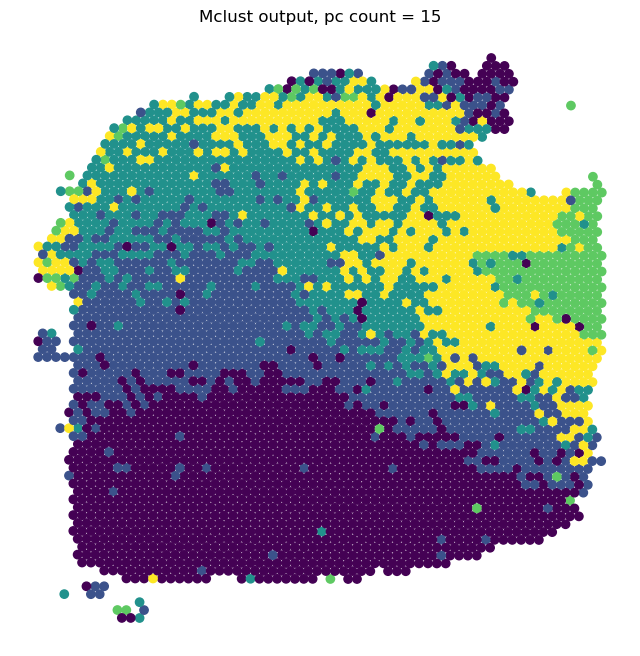

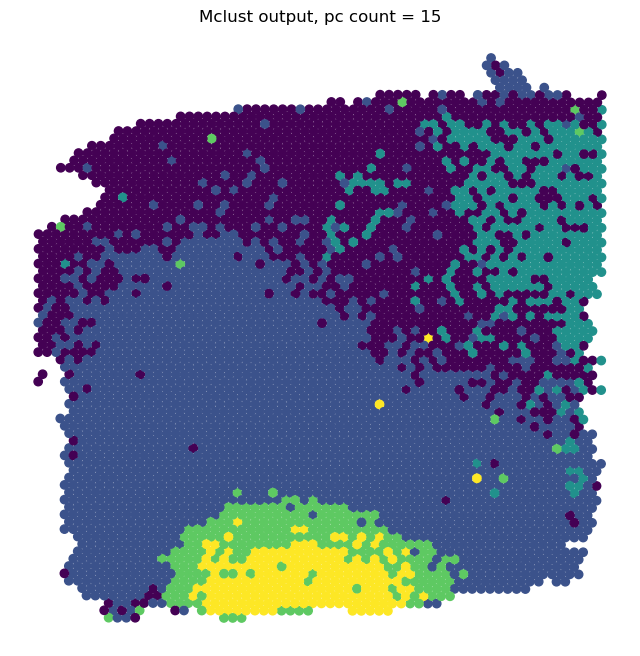

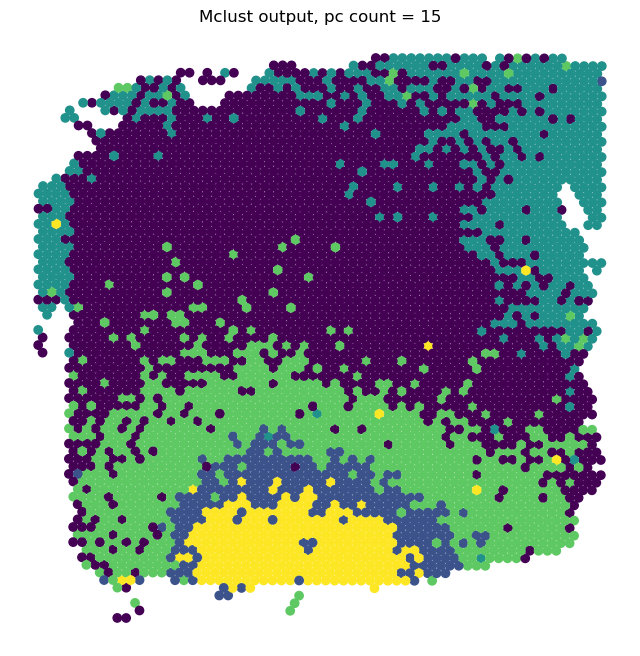

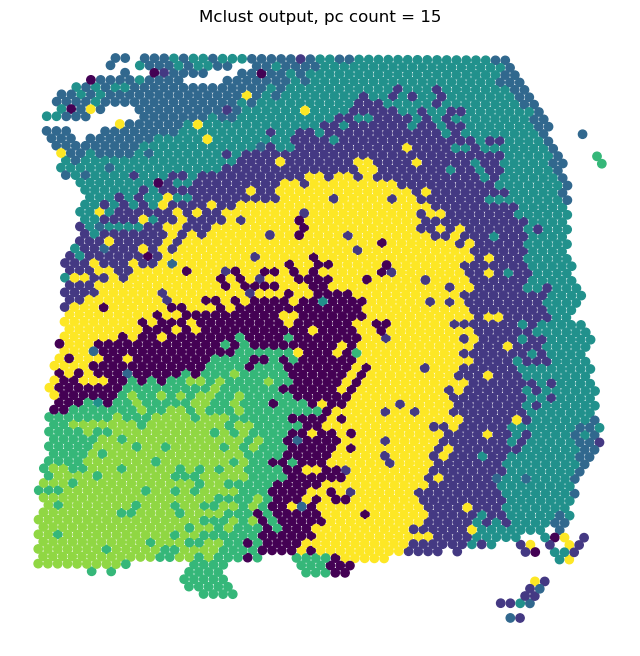

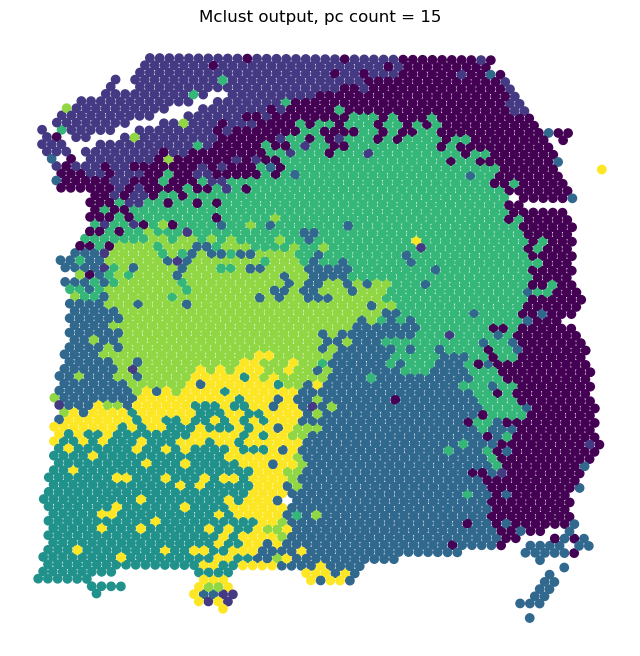

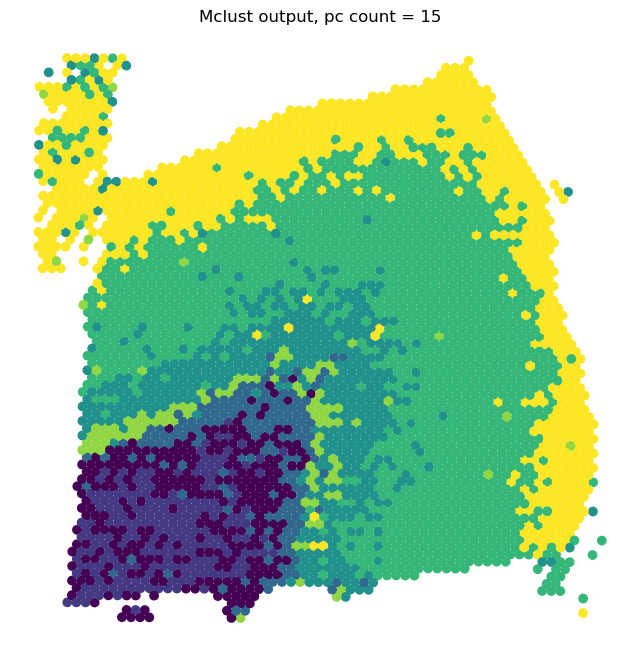

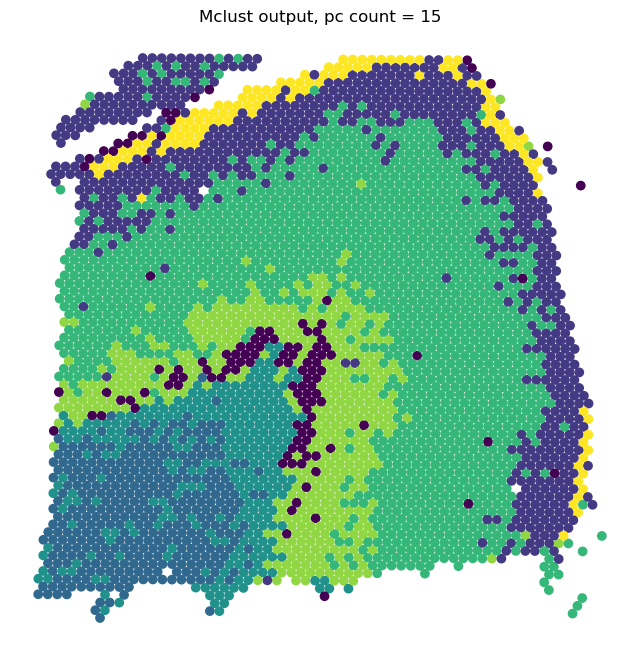

In [31]:
for sample in samples:
    df = pd.read_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/Principal_Components/CSV/pcs_15_from_bayesSpace_top_2000_HVGs.csv')
    df_manual_annoatation = pd.read_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/manual_annotations.csv', index_col=0)
    unique_elem = np.unique(df_manual_annoatation['label'].values)
    cluster_count = len([x for x in unique_elem if not math.isnan(x)])

    df = df.set_index('Unnamed: 0')
    # df.head()

    def mclust_R(x, n_clusters, model='EEE', random_seed=2020):
        """
        Clustering using the mclust algorithm.
        The parameters are the same as those in the R package mclust.
        """

        np.random.seed(random_seed)
        import rpy2.robjects as robjects
        # robjects.r('install.packages("mclust")')
        robjects.r.library("mclust")

        import rpy2.robjects.numpy2ri
        rpy2.robjects.numpy2ri.activate()
        r_random_seed = robjects.r['set.seed']
        r_random_seed(random_seed)
        rmclust = robjects.r['Mclust']

        res = rmclust(rpy2.robjects.numpy2ri.numpy2rpy(x), n_clusters, model)
        probabilities = res[-3] # probability that spot i is in cluster k
        mclust_res = np.array(res[-2]).astype(int) - 1
        
        return mclust_res, probabilities

    n_pcs = 15
    n_clusters = cluster_count
    model = 'EEE'

    os.makedirs(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/Mclust_stuffs/Figures', exist_ok=True)

    out, p = mclust_R(df.values[:, :n_pcs], n_clusters, model=model)

    df_mclust_scribble = pd.DataFrame({'cluster.init':out},index=df.index.values)
    df_mclust_probabilities = pd.DataFrame(p, index=df.index.values, columns=list(range(n_clusters)))

    # os.makedirs(os.dirpath(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/others/bcdc_ffpe/Mclust_stuffs/probabilites_model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.csv'))
    df_mclust_probabilities.to_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/Mclust_stuffs/probabilities_model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.csv')

    df_mclust_scribble.head()

    df_mclust_scribble.to_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/mclust_scribble.csv')

    adata = sc.read_visium(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/reading_h5', count_file=f'{sample}_filtered_feature_bc_matrix.h5')
    adata.var_names_make_unique()
    # print(adata)
    df_joined = adata.obs.join(df_mclust_scribble)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.title(f'Mclust output, pc count = {n_pcs}')
    plt.scatter(adata.obsm['spatial'][:, 0], -adata.obsm['spatial'][:, 1], c=df_joined['cluster.init'].values)
    plt.savefig(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/Mclust_stuffs/Figures/model_{model}_pcs_{n_pcs}_cluster_{n_clusters}.jpg')

    # df_man = pd.read_csv(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/manual_annotations.csv', index_col=0)
    # df_joined_with_man = df_joined.join(df_man)

    # plt.figure(figsize=(8, 8))
    # plt.axis('off')
    # plt.title('Manual annotation')
    # plt.scatter(df_joined_with_man['imagecol'],df_joined_with_man['imagerow'],c=df_joined_with_man['label'].values)
    # plt.savefig(f'/home/nuwaisir/Corridor/Thesis_ug/ScribbleSeg_Revision_working/Data/Human_DLPFC/{sample}/manual_annotation.jpg')